# Assignment 1

In [4]:
name = 'Ivan Khabarov' 
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [103]:
# your code here
def my_function(question_count, knocks=1, *friends, opener="", **others):
    '''
    Sheldon Cooper knocks on the door.

    Args:
        question_count - the first value;
        knocks - count of knocks;
        *friends - friends of Sheldon;
        opener - who open the door;
        **others - where are the other friends.

    Returns:
    
    '''
    for friend in friends:
        for _ in range(question_count):
            print('knock '*knocks + f'{friend}?')
        print()
    print(f'Hi, {opener}!')
    print()
    print('Where are the others?',end='\n\n')
    for key in others.keys():
        print(f'- {key.capitalize()} {others[key]}.')

my_function(3, 3, "Penny", "Hovard", opener="Penny", raj='at home', leonard='at work')

knock knock knock Penny?
knock knock knock Penny?
knock knock knock Penny?

knock knock knock Hovard?
knock knock knock Hovard?
knock knock knock Hovard?

Hi, Penny!

Where are the others?

- Raj at home.
- Leonard at work.


## Exercise 1


In [104]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    # your code here
    for i in range(2,n):
        if n % i == 0:
            return print(f"Number {n} is NOT prime")
    return print(f"Number {n} is prime")

for number in range(2,20):
    is_prime(number)

Number 2 is prime
Number 3 is prime
Number 4 is NOT prime
Number 5 is prime
Number 6 is NOT prime
Number 7 is prime
Number 8 is NOT prime
Number 9 is NOT prime
Number 10 is NOT prime
Number 11 is prime
Number 12 is NOT prime
Number 13 is prime
Number 14 is NOT prime
Number 15 is NOT prime
Number 16 is NOT prime
Number 17 is prime
Number 18 is NOT prime
Number 19 is prime


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [105]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """
    # your code here
    print(f'The name of the function: {func.__name__}')
    print()
    print('Arguments:')
    signature = inspect.signature(func)
    for name, param in signature.parameters.items():
        print(f"    name: {name}")
        print(f"    type: {param.kind}")
        print(f"    default: {param.default if param.default != inspect.Parameter.empty else 'None'}")
        print()

inspect_function(my_function)

The name of the function: my_function

Arguments:
    name: question_count
    type: POSITIONAL_OR_KEYWORD
    default: None

    name: knocks
    type: POSITIONAL_OR_KEYWORD
    default: 1

    name: friends
    type: VAR_POSITIONAL
    default: None

    name: opener
    type: KEYWORD_ONLY
    default: 

    name: others
    type: VAR_KEYWORD
    default: None



## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [101]:
from datetime import datetime
from time import sleep
 
# wrong function
def my_time_now(msg):
    print(msg, datetime.now())


In [106]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-08 15:16:14.257141
The time is now:  2024-12-08 15:16:15.264556
The time is now:  2024-12-08 15:16:16.269318


## Exercise 4

In [145]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    # your code here 
    count = 0
    for item in input_generator:
        if count >= max_count:
            break
        yield item
        count += 1

def generator():
    i=0
    while True:
        yield i
        i+=1

limited_gen = limit(generator(), 10)
print(list(limited_gen))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [151]:
# your code here
def pascals_triangle():
    row = [1] 
    while True:
        for num in row:
            yield num
        row = [1] + [row[i] + row[i + 1] for i in range(len(row) - 1)] + [1]

limited_gen = limit(pascals_triangle(), 20)
print(list(limited_gen))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5]


## Exercise 6


In [161]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """
    # your code here
    path = pathlib.Path(path_to_dir)
    
    stat_list = []
    for file in path.iterdir():
        if file.is_file():
            stat_list.append((file.name, file.stat().st_size))
    
    sorted_files = sorted(stat_list, key=lambda x: (x[1], x[0]))

    # show sorted list
    # for i in sorted_files:
    #     print(i[0], i[1])
    
    return [file[0] for file in sorted_files]


result = files_sorted_by_size("../aoc_example")
print(result)

['test_day2.py', 'aoc1.py', 'aoc2.py', 'test_day1.py']


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [ ]:
def merge_sorter(*args):
    # your code here
    raise NotImplementedError

In [206]:
import heapq

def merge_sorter(*iterables):
    iterators = [iter(it) for it in iterables]
    heap = []

    for idx, it in enumerate(iterators):
        try:
            first_value = next(it)
            heapq.heappush(heap, (first_value, idx))
        except StopIteration:
            pass 

    while heap:
        value, idx = heapq.heappop(heap)
        yield value
        try:
            next_value = next(iterators[idx])
            heapq.heappush(heap, (next_value, idx))
        except StopIteration:
            pass 

LIST = [1, 4, 7]
TUPLE = (2, 5, 8)
DICT = {3:3, 6:6, 9:9}
GENERATOR = (x for x in [10, 11, 12]) 

merged = merge_sorter(LIST, TUPLE, DICT, GENERATOR)
print(list(merged))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [242]:
import time

def profiler(func):
    # your code here
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        wrapper.calls += 1
        wrapper.last_time_taken = time.time() - start_time
        return result
    wrapper.last_time_taken = 0
    wrapper.calls = 0
    start_time = time.time()
    return wrapper

@profiler
def ackermann(n, m):
    # your code here
    if n == 0: 
        return m + 1
    elif n > 0 and m == 0:
        return ackermann(n - 1, 1)
    return ackermann(n - 1, ackermann(n, m - 1))

print(ackermann(2,2))
print(ackermann.last_time_taken)
print(ackermann.calls)


7
4.887580871582031e-05
27


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [212]:
def encode(sequence):
    # your code here
    output = ''
    count = 1  
    
    for i in range(1, len(sequence)):
        if sequence[i] == sequence[i - 1]: 
            count += 1 
        else:
            output += f"{count}{sequence[i - 1]}"  
            count = 1  
    
    output += f"{count}{sequence[-1]}"
    return output

encode('AAABBCDDEEEE')

'3A2B1C2D4E'

## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

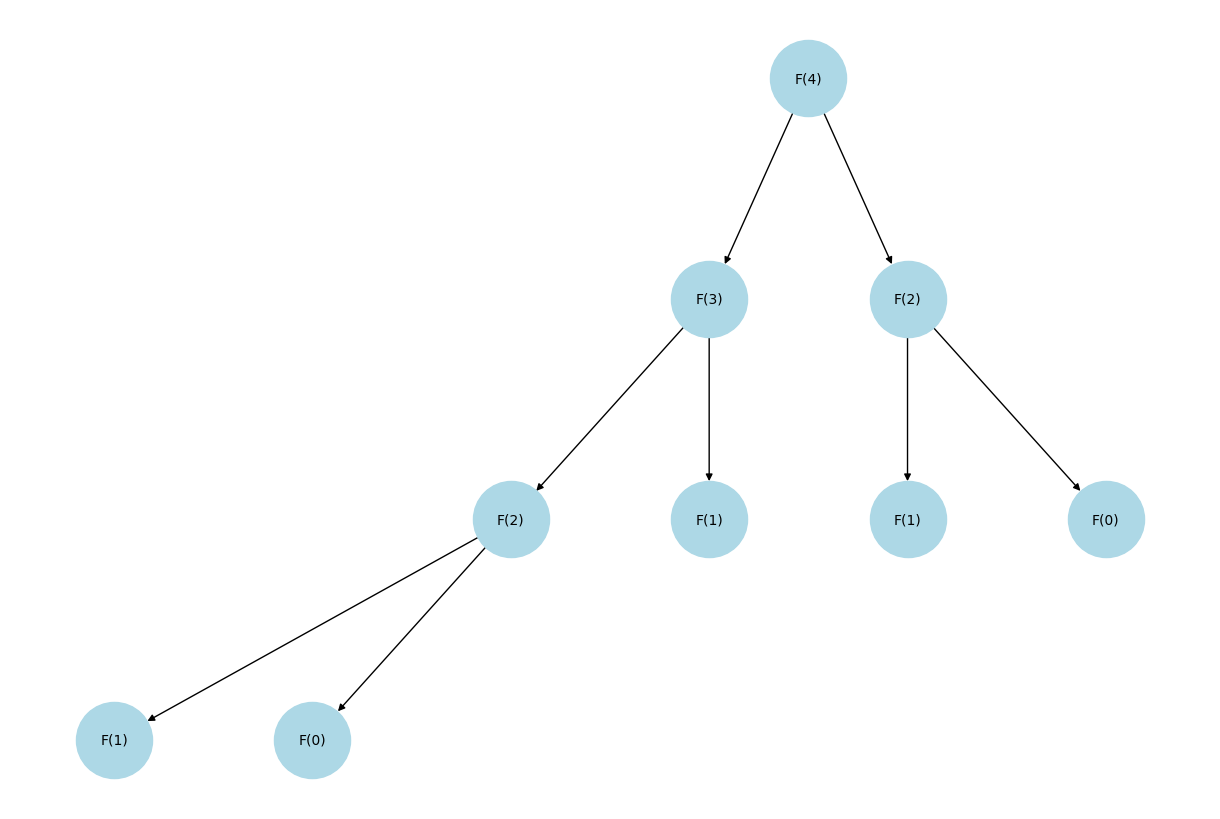

3


In [238]:
import networkx as nx
import matplotlib.pyplot as plt

def fibonacci_visualizer():
    def visualizer(func):
        G = nx.DiGraph()  
        call_counter = {"counter": 0}  

        def wrapper(n, parent=None):
            call_id = call_counter["counter"]
            call_counter["counter"] += 1

            G.add_node(call_id, label=f"F({n})")

            if parent is not None:
                G.add_edge(parent, call_id)
            if n == 0 or n == 1:
                return n
            left = wrapper(n - 1, parent=call_id)
            right = wrapper(n - 2, parent=call_id)

            return left + right
        
        def calculate_positions(tree):
            pos = {}
            levels = {} 

            def assign_levels(node, level):
                if node not in levels:
                    levels[node] = level
                for child in tree.successors(node):
                    assign_levels(child, level + 1)

            assign_levels(0, 0)

            max_level = max(levels.values())
            level_widths = [2 ** lvl for lvl in range(max_level + 1)] 

            x_offsets = {lvl: 0 for lvl in range(max_level + 1)}
            for node, level in levels.items():
                x = x_offsets[level] - level_widths[level] / 2
                y = -level  
                pos[node] = (x, y)
                x_offsets[level] += 1
            return pos

        def draw_graph():
            labels = nx.get_node_attributes(G, "label")
            plt.figure(figsize=(12, 8))
            pos = calculate_positions(G)  
            nx.draw(G, pos, with_labels=False, node_size=3000, node_color="lightblue")
            nx.draw_networkx_labels(G, pos, labels, font_size=10)
            plt.show()

        def wrapped(*args, **kwargs):
            result = wrapper(*args, **kwargs)
            draw_graph()  
            return result
        
        return wrapped
    return visualizer


@fibonacci_visualizer()
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

print(fibonacci(4))

3


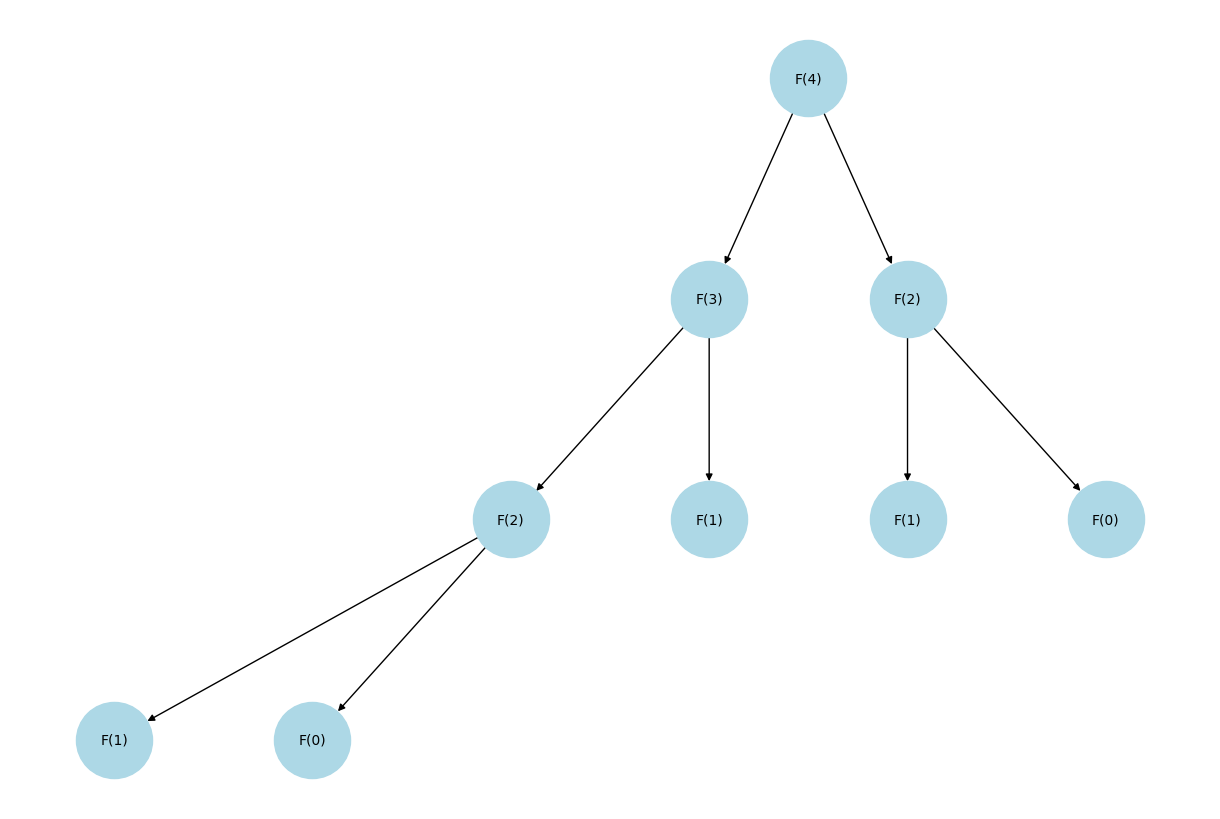

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizer(func):
    call_counter = {"counter": 0}  

    def wrapper(**kwargs):
        call_id = call_counter["counter"]
        call_counter["counter"] += 1
        wrapper.graph.add_node(call_id, label=f"F({kwargs['n']})")

        if kwargs['parent'] is not None:
            wrapper.graph.add_edge(kwargs['parent'], call_id)
        if kwargs['n'] == 0 or kwargs['n'] == 1:
            return kwargs['n']
        left = wrapper(n = kwargs['n'] - 1, parent=call_id)
        right = wrapper(n = kwargs['n'] - 2, parent=call_id)
        return left + right
    
    wrapper.graph = nx.DiGraph()
    return wrapper



def calculate_positions(tree):
    pos = {}
    levels = {} 

    def assign_levels(node, level):
        if node not in levels:
            levels[node] = level
        for child in tree.successors(node):
            assign_levels(child, level + 1)

    assign_levels(0, 0)

    max_level = max(levels.values())
    level_widths = [2 ** lvl for lvl in range(max_level + 1)] 

    x_offsets = {lvl: 0 for lvl in range(max_level + 1)}
    for node, level in levels.items():
        x = x_offsets[level] - level_widths[level] / 2
        y = -level  
        pos[node] = (x, y)
        x_offsets[level] += 1
    return pos


@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

print(fibonacci(n=4, parent=None))

G = fibonacci.graph
labels = nx.get_node_attributes(G, "label")
plt.figure(figsize=(12, 8))
pos = calculate_positions(G)  
nx.draw(G, pos, with_labels=False, node_size=3000, node_color="lightblue")
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.show()



## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [ ]:
def memoizer(func):
    # your code here
    raise NotImplementedError

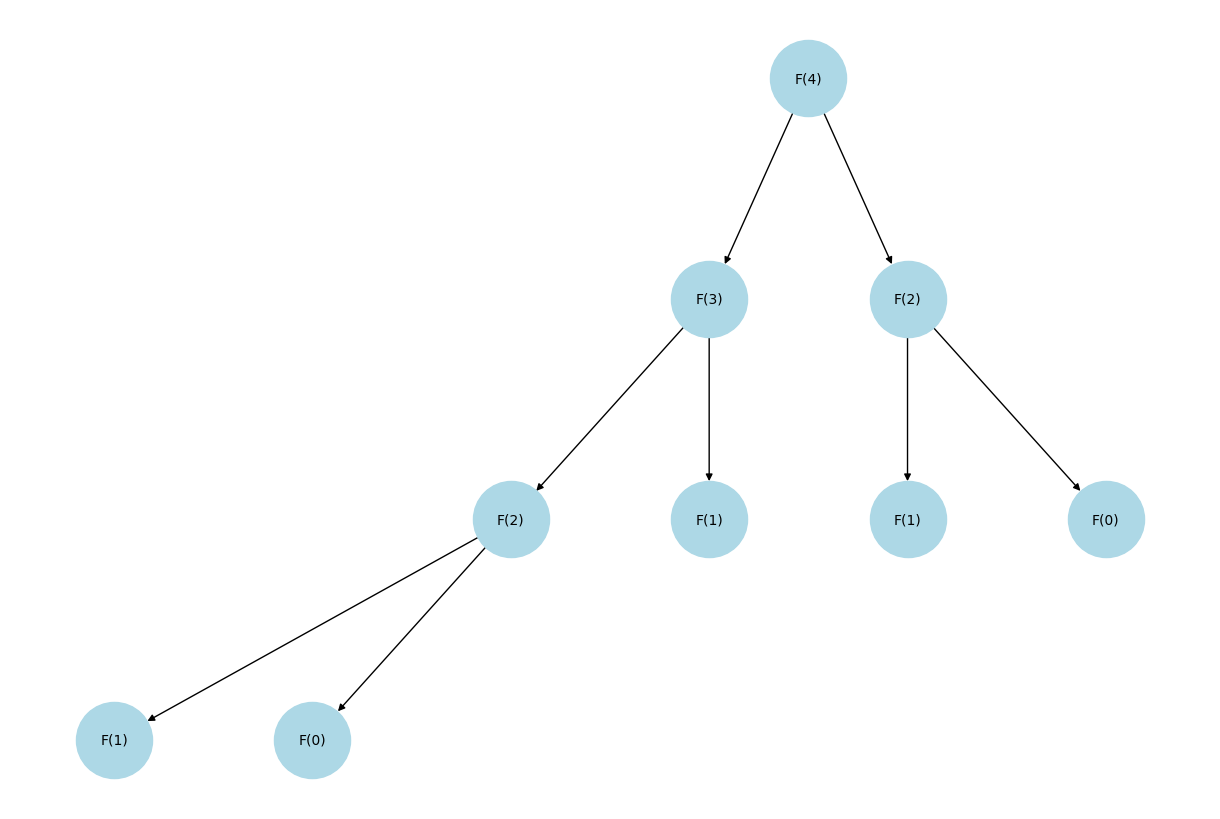

3


AttributeError: 'function' object has no attribute 'last_time_taken'

In [243]:
@fibonacci_visualizer()
@profiler
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

print(fibonacci(4))
print(fibonacci.last_time_taken)
print(fibonacci.calls)

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

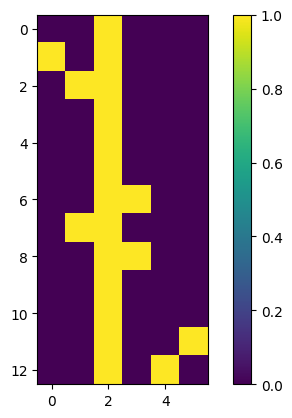

In [232]:
import matplotlib.pyplot as plt
import numpy as np

list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

matrix = np.zeros((len(list_of_objects), len(list_of_types)))

for i, obj in enumerate(list_of_objects):
    for j, type in enumerate(list_of_types):
        matrix[i,j] = isinstance(obj, type)

plt.imshow(matrix)
plt.colorbar()
plt.show()